In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pre_pros=pd.read_csv("pre_processed_logs.csv")
pre_pros.drop("Unnamed: 0",axis=1,inplace=True)
pre_pros

,Description,Assignment group
0,verify user detail employee manager name check...,0
1,hello team meeting skype etc appear outlook ca...,0
2,can not log vpn good,0
3,unable access tool page,0
4,skype error,0
...,...,...
8433,good afternoon receive email send mail please ...,22
8434,telephony software issue,0
8435,vip windows password reset tifpdchb pedxruyf,0
8436,unable access machine utility finish drawer ad...,44


In [ ]:
train_logs, test_logs = train_test_split(pre_pros, test_size=0.2)

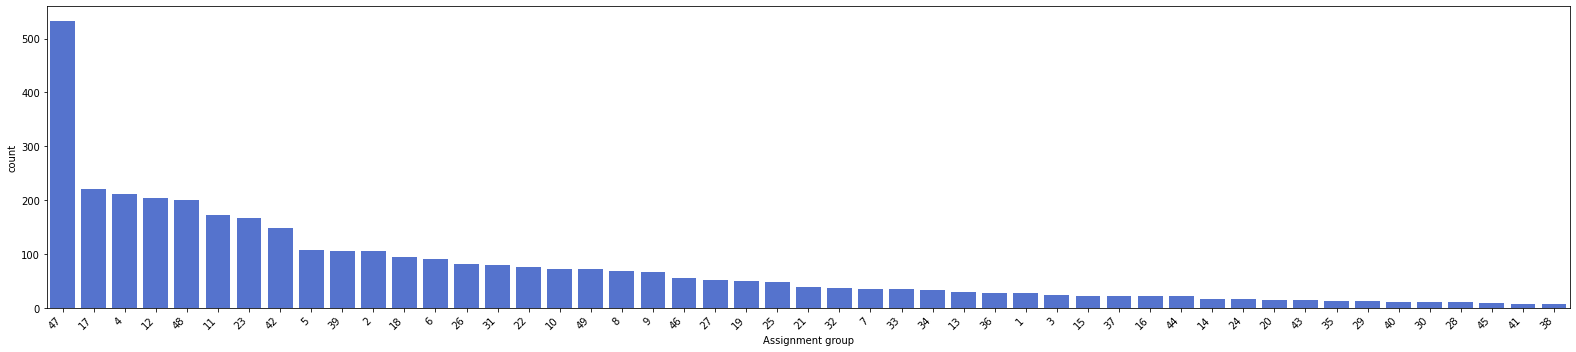

In [ ]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
itTicketOthersDF = train_logs[train_logs['Assignment group'] !=0]

descending_order = itTicketOthersDF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketOthersDF, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
maxOthers = itTicketOthersDF['Assignment group'].value_counts().max()
maxOthers

533

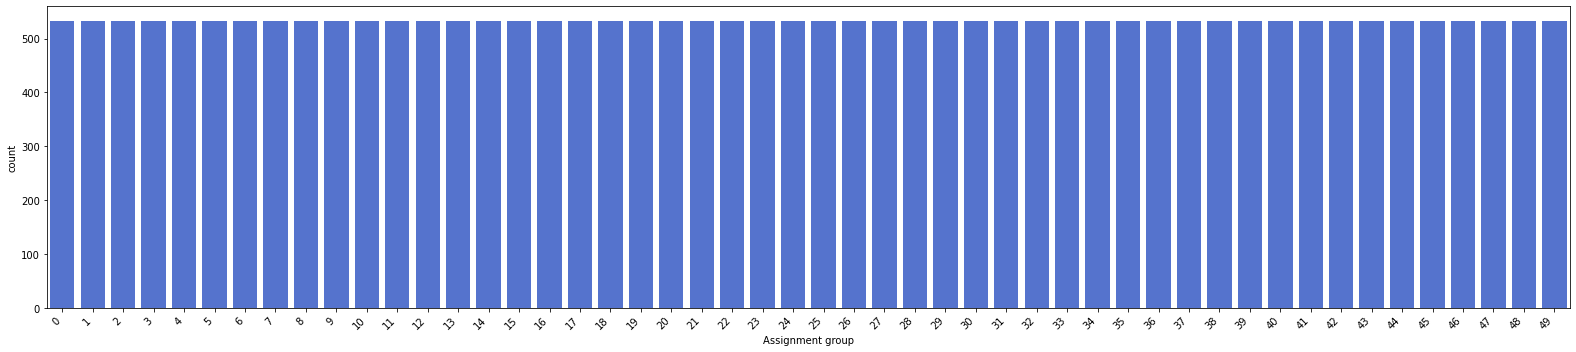

In [ ]:
# Treat the imbalnce in the itTicketDF dataset by resampling to 661.This is for us to try creating a single model which use the whiole dataset & verify the performance
from sklearn.utils import resample
itTicketDF_resampled = train_logs[0:0]
for grp in train_logs['Assignment group'].unique():
    itTicketGrpDF = train_logs[train_logs['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers), random_state=123)
    itTicketDF_resampled = itTicketDF_resampled.append(resampled)

descending_order = itTicketDF_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketDF_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
itTicketDF_resampled.to_csv("new_train_resampled.csv")
test_logs.to_csv("test_logs.csv")

In [ ]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe= label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return dataframe,grp_mapping

#itTicketGRP0DF['Assignment group'] , grp_mapping_grp0= labelencoder(itTicketGRP0DF['Assignment group'])
#itTicketOthersDF_resampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(itTicketOthersDF_resampled['Assignment group'])
itTicketDF_resampled['Assignment group'] , grp_mapping_all_resampled= labelencoder(itTicketDF_resampled['Assignment group'])
train_logs['Assignment group'],grp_mapping_all_raw = labelencoder(train_logs['Assignment group'])
test_logs['Assignment group'],grp_mapping_all_raw = labelencoder(test_logs['Assignment group'])

In [ ]:
itTicketDF_resampled.to_csv("new_train_resampled_encoded.csv")
train_logs.to_csv("train_logs_encoded.csv")
test_logs.to_csv("test_logs_encoded.csv")

In [ ]:
itTicketDF=pd.read_csv("new_train_resampled_encoded.csv")
itTicketDF.Description=itTicketDF.Description.astype(str)
itTicketDF.drop("Unnamed: 0",axis=1,inplace=True)
itTicketDF.head(5)

,Description,Assignment group
0,tool unable connect server time recording work...,17
1,hello show blue side many white letter type op...,17
2,install zebra,17
3,barcode scanner defective,17
4,pick old equipment,17


In [ ]:
test_logs

,Description,Assignment group
5591,ticket update,0
1155,problem outlook,17
6831,volume label dat ebhsm dcc server space consum...,45
622,hello please help issue unable update status t...,0
2120,job fail scheduler,48
...,...,...
3,unable access tool page,0
183,windows account lock,0
2797,engineering tool error machining cloud stop work,0
8008,kindly help access draw search view download b...,0


In [ ]:
def wordTokenizer(dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe

In [ ]:
maxlen = 150
numWords = 9000
tokenizer,X = wordTokenizer(itTicketDF['Description'])
y = np.asarray(itTicketDF['Assignment group'])
X = pad_sequences(X, maxlen = maxlen)

print("Number of Samples:", len(X))
print("Number of Labels: ", len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
print("Number of train Samples:", len(X_train))
print("Number of val Samples:", len(X_test))

Number of Samples: 26650
Number of Labels:  26650
Number of train Samples: 23985
Number of val Samples: 2665


In [ ]:
rawClf=RandomForestClassifier(n_estimators=100)
rawClf.fit(X_train,y_train)
y_pred=rawClf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9208255159474672


In [ ]:
X_test

array([[   0,    0,    0, ...,   10,  325,   60],
       [   0,    0,    0, ...,  174, 3879,   39],
       [   0,    0,    0, ...,    6,   21,  590],
       ...,
       [   0,    0,    0, ...,  247,  227,   13],
       [ 856,  350,   86, ..., 1426,  668,  666],
       [   0,    0,    0, ..., 1260,    4,  142]], dtype=int32)

In [ ]:
test_new=pd.read_csv("test_logs_encoded.csv")
test_new.Description=test_new.Description.astype(str)
test_new.drop("Unnamed: 0",axis=1,inplace=True)
test_new.head(5)
tokenizer_new,X_new = wordTokenizer(test_new['Description'])
X_new = pad_sequences(X, maxlen = maxlen)

In [ ]:
X_new_test=X_new[np.random.choice(X_new.shape[0], 2665, replace=False), :]

In [ ]:
y_pred_new=rawClf.predict(X_new_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_new))

Accuracy: 0.02401500938086304


In [ ]:
dfcmpr = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred}, columns=['y_test', 'y_pred'])
dfcmpr

In [ ]:
count=0
for i in range(len(y_test)):
  if y_test[i]!=y_pred[i]:
    count+=1
print(count)

522


In [ ]:
va=(522/6610)*100
va

7.897125567322238

In [ ]:
results_ml=pd.DataFrame()
tempResultsDf_ml = pd.DataFrame({'Model':['Random Forest'], 'accuracy': [metrics.accuracy_score(y_test, y_pred)]},index={'1'})
results_ml = pd.concat([results_ml, tempResultsDf_ml])
results_ml

SVM

In [ ]:
Cs = [0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svc = svm.SVC(kernel='rbf')
grid_search = GridSearchCV(svc, param_grid)
grid_search.fit(X_train,y_train)

clf = svm.SVC(**grid_search.best_params_)
clf.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9267776096822995

Creating New Dataset

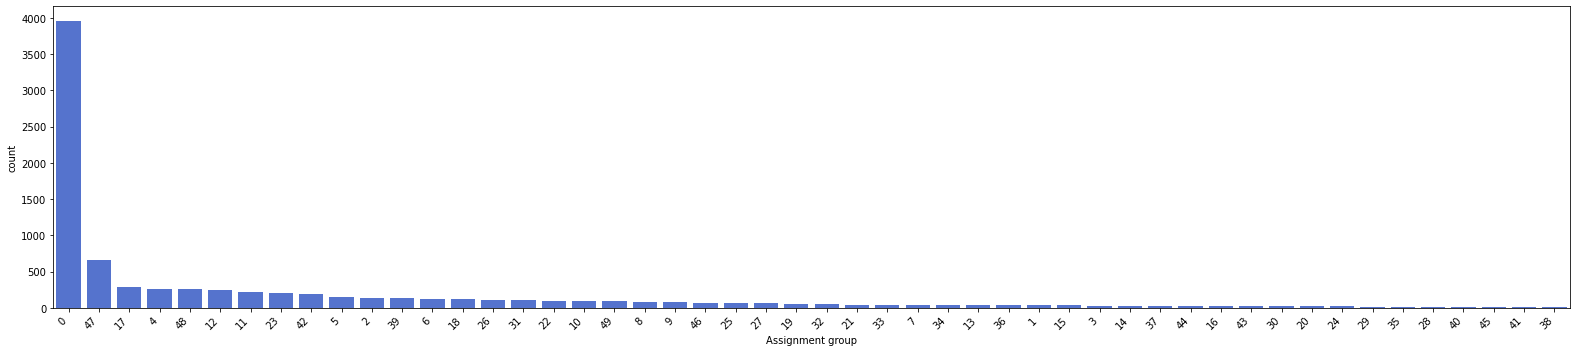

In [ ]:
descending_order = pre_pros['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#added code for x label rotate 
ax=sns.countplot(x='Assignment group', data=pre_pros, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
pre_pros

,Description,Assignment group
0,verify user detail employee manager name check...,0
1,hello team meeting skype etc appear outlook ca...,0
2,can not log vpn good,0
3,unable access tool page,0
4,skype error,0
...,...,...
8433,good afternoon receive email send mail please ...,22
8434,telephony software issue,0
8435,vip windows password reset tifpdchb pedxruyf,0
8436,unable access machine utility finish drawer ad...,44


In [ ]:
grp_0=pre_pros[pre_pros['Assignment group'] ==0]
grp_47=pre_pros[pre_pros['Assignment group'] ==47]
grp_17=pre_pros[pre_pros['Assignment group'] ==17]
grp_4=pre_pros[pre_pros['Assignment group'] ==4]
grp_48=pre_pros[pre_pros['Assignment group'] ==48]

In [ ]:
grp_0=grp_0.sample(n=250,replace=False, random_state=1)
grp_47=grp_47.sample(n=250,replace=False, random_state=1)
grp_17=grp_17.sample(n=250,replace=False, random_state=1)
grp_4=grp_4.sample(n=250,replace=False, random_state=1)
grp_48=grp_48.sample(n=250,replace=False, random_state=1)

In [ ]:
grp_47.loc[grp_47['Assignment group'] == 47, 'Assignment group'] = 1
grp_17.loc[grp_17['Assignment group'] == 17, 'Assignment group'] = 2
grp_4.loc[grp_4['Assignment group'] == 4, 'Assignment group'] = 3
grp_48.loc[grp_48['Assignment group'] == 48, 'Assignment group'] = 4

In [ ]:
grp_48

,Description,Assignment group
2295,job fail scheduler,4
8419,team go ess file check thing ytd screen show r...,4
8056,abende job scheduler,4
4896,job fail scheduler,4
3127,scthyott lortwe nwfodmhc exurcwkm trup recode ...,4
...,...,...
4075,job bwdpmbkp fail scheduler,4
6837,job fail scheduler,4
4196,job fail scheduler,4
2367,update exist product management master key fig...,4


In [ ]:
df_five_group=pd.DataFrame()
frames = [grp_0, grp_47, grp_17,grp_4,grp_48]
df_five_group=pd.concat(frames)

In [ ]:
df_five_group

,Description,Assignment group
5913,zdsxmcwu thdjzolwronization issue,0
2210,unable open attachment outlook,0
2355,erp sid password reset,0
191,user able see text mail iphone,0
1024,login issue verify user detail employee manage...,0
...,...,...
4075,job bwdpmbkp fail scheduler,4
6837,job fail scheduler,4
4196,job fail scheduler,4
2367,update exist product management master key fig...,4


In [ ]:
df_five_group=df_five_group.sample(frac = 1)
df_five_group

,Description,Assignment group
4446,job fail scheduler,4
6472,job fail scheduler,1
1313,circuit outage company usa plant bld carb acce...,1
6801,job fail scheduler,3
2200,hello please usa access add shryresh rdyrty sh...,3
...,...,...
4936,blank call germany interaction,0
480,job fail scheduler,4
2393,job fail scheduler,4
1958,job fail scheduler,3


In [ ]:
df_five_group.reset_index(drop=True,inplace=True)
df_five_group

In [ ]:
df_five_group.to_csv("IT_Five_Groups_grp_renamed.csv")

In [ ]:
maxlen = 150
numWords = 9000
tokenizer,X = wordTokenizer(df_five_group['Description'])
y = np.asarray(df_five_group['Assignment group'])
X = pad_sequences(X, maxlen = maxlen)

print("Number of Samples:", len(X))
print("Number of Labels: ", len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print("Number of train Samples:", len(X_train))
print("Number of val Samples:", len(X_test))

Number of Samples: 1250
Number of Labels:  1250
Number of train Samples: 1000
Number of val Samples: 250


In [ ]:
rawClf=RandomForestClassifier(n_estimators=100)
rawClf.fit(X_train,y_train)
y_pred=rawClf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.66


SVM

In [ ]:
Cs = [0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svc = svm.SVC(kernel='rbf')
grid_search = GridSearchCV(svc, param_grid)
grid_search.fit(X_train,y_train)

clf = svm.SVC(**grid_search.best_params_)
clf.fit(X_train, y_train)

SVC(C=10, gamma=0.001)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.516

In [ ]:
df_five_group

,Description,Assignment group
0,erp sid password reset,0
1,job bkbackup tool sql prod inc fail scheduler,47
2,hello could please help retrieve delete folder...,4
3,job fail scheduler,4
4,type outage network circuit power please speci...,47
...,...,...
1245,problem label print laser,17
1246,job fail scheduler,48
1247,job fail scheduler,48
1248,hostname report engineering tooling production...,4


LSTM

In [ ]:
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Add Function to capture results from each model 
import operator
def captureData(dataframe,modelHistory,modelName,descriptions,index_df,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    index, acc_value = max(enumerate(modelHistory.history['val_accuracy']), key=operator.itemgetter(1))
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'val_accuracy': [acc_value],
      'val_loss':[modelHistory.history['val_loss'][index]],
      'loss':[modelHistory.history['loss'][index]],
      'accuracy':[modelHistory.history['accuracy'][index]],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','val_accuracy' ,'val_loss','loss','accuracy','descriptions']] 
  return dataframe

def capturePrediction(dataframe,modelName,descriptions,index_df,pred_accuracy,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'Pred_Accuracy' : [pred_accuracy],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','Pred_Accuracy','descriptions']] 
  return dataframe


In [ ]:
project_path="./"
sentences = [line.split(' ') for line in df_five_group['Description']]
word2vec = Word2Vec(sentences=sentences,min_count=1)
word2vec.wv.save_word2vec_format(project_path+ 'word2vec_vector.txt')

In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open(project_path+'word2vec_vector.txt')

for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))


Loaded 2388 word vectors.


In [ ]:
maxlen = 300
numWords=9000
epochs = 10

In [ ]:
results=pd.DataFrame()
pred_results = pd.DataFrame()

In [ ]:
class LstmModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) # changed by Abraham
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['Description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs):
   
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
    lstm=Bidirectional(LSTM(128))(embed)
    drop=Dropout(0.3)(lstm)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    self.model.summary()
    plot_model(self.model,to_file="LSTM_Model.jpg")

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))

    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",metrics.accuracy_score(self.y_test, pred))
     return accuracy, pred

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

In [ ]:
# Check how the LSTM Model perform with the cleansed data
lstmModelRawData = LstmModel()
lstmModelRawData_history, model = lstmModelRawData.train(df_five_group,100,epochs)
rawData_accuracy,pred_val = lstmModelRawData.prediction()

Number of Samples: 1250
Number of Labels:  1250
Number of train Samples: 1000
Number of val Samples: 250
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 300, 100)          900100    
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               25700     
                                                                 
 dense_5 (Dense)    

In [ ]:
results=pd.DataFrame()
pred_results = pd.DataFrame()
results=captureData(results,lstmModelRawData_history,'LSTM model_WV_rawdata','LSTM+Word2Vec Embedding on raw data','1',0)
pred_results= capturePrediction(pred_results,'LSTM model_WV_rawdata','LSTM+Word2Vec Embedding on raw data','1',rawData_accuracy,0)

In [ ]:
results

,model,val_accuracy,val_loss,loss,accuracy,descriptions
1,LSTM model_WV_rawdata,0.788,0.630669,0.2531,0.881,LSTM+Word2Vec Embedding on raw data


In [ ]:
pred_results

,model,Pred_Accuracy,descriptions
1,LSTM model_WV_rawdata,0.788,LSTM+Word2Vec Embedding on raw data


In [ ]:
len(pred_val)

250